In [1]:
# Basic imports
import os,sys,re
from importlib import reload
import numpy as np
import pandas as pd
# ChromAn related imports
sys.path.append(r'/lab/weissman_imaging/puzheng/Softwares/') # parent folder of ChromAn
#import torch
print(os.getpid())

2034606


# Data folder

In [12]:
from ChromAn.src.file_io.data_organization import search_fovs_in_folders
data_folder = r'/lab/weissman_imaging/puzheng/PE_LT/20231012-4T1v21x_50k0927_digestion_test/37c_2day'
# scan subfolders
folders, fovs = search_fovs_in_folders(data_folder)
# correction folder
correction_folder=os.path.join(data_folder, 'Corrections')
if not os.path.exists(correction_folder):
    print(f"creating folder: {correction_folder}")
    os.makedirs(correction_folder)

- searching in folder: /lab/weissman_imaging/puzheng/PE_LT/20231012-4T1v21x_50k0927_digestion_test/37c_2day
-- 1 folders, 233 fovs detected.
creating folder: /lab/weissman_imaging/puzheng/PE_LT/20231012-4T1v21x_50k0927_digestion_test/37c_2day/Corrections


## Load color_usage

In [16]:
from ChromAn.src.file_io.data_organization import Color_Usage
# Color usage file marks the organization of imaging files
color_usage_filename = os.path.join(data_folder, 'Analysis', 'color_usage_clearing.csv')
color_usage_df = Color_Usage(color_usage_filename)

- load color_usage from file: /lab/weissman_imaging/puzheng/PE_LT/20231012-4T1v21x_50k0927_digestion_test/37c_2day/Analysis/color_usage_clearing.csv


# Illumnation correction

skipped, this part don't need to change

# Chromatic abbrevation

In [17]:
from ChromAn.src.file_io.dax_process import DaxProcesser
daxp = DaxProcesser(os.path.join(folders[0], fovs[0]))

Initialize DaxProcesser for file:/lab/weissman_imaging/puzheng/PE_LT/20231012-4T1v21x_50k0927_digestion_test/37c_2day/H0M1/Conv_zscan_000.dax
- New save file: /lab/weissman_imaging/puzheng/PE_LT/20231012-4T1v21x_50k0927_digestion_test/37c_2day/H0M1/Conv_zscan_000_processed.hdf5
-- all used channels: ['748', '637', '545', '477', '405']


In [18]:
num_chromatic_channels = 3
chroamtic_channels = daxp.channels[:num_chromatic_channels]
print(chroamtic_channels)
chromatic_ref_channel = chroamtic_channels[int(num_chromatic_channels/2)]
print(chromatic_ref_channel)

['748', '637', '545']
637


## 750 to 637

In [19]:
cc_folder = folders[0]
ref_folder = folders[0]
print(f"chromatic_corr_folder: {cc_folder},\nref_folder:{ref_folder}")

chromatic_corr_folder: /lab/weissman_imaging/puzheng/PE_LT/20231012-4T1v21x_50k0927_digestion_test/37c_2day/H0M1,
ref_folder:/lab/weissman_imaging/puzheng/PE_LT/20231012-4T1v21x_50k0927_digestion_test/37c_2day/H0M1


In [20]:
from ChromAn.src.correction_tools import chromatic
fiducial_channel = color_usage_df.get_fiducial_channel(color_usage_df)
chromatic_channel = [_ch for _ch, _info in \
                color_usage_df.loc[os.path.basename(cc_folder)].items()
                if _info not in ['empty', 'beads', 'DAPI', np.nan]][0]

-- all used channels: ['748', '637', '545', '477', '405']
-- single image size: [  40 2304 2304]
- Loaded images for channels:['748', '637', '545', '477', '405'] in 2.201s.
-- loading illumination correction profile from file:
	 637 illumination_correction_637_2304x2304.npy
	 748 illumination_correction_748_2304x2304.npy
	 477 illumination_correction_477_2304x2304.npy
++ generating chromatic info for 60 images in 15 threads in Initialize DaxProcesser for file:/lab/weissman_imaging/puzheng/PE_LT/20231012-4T1v21x_50k0927_digestion_test/37c_2day/H0M1/Conv_zscan_000.dax
- New save file: /lab/weissman_imaging/puzheng/PE_LT/20231012-4T1v21x_50k0927_digestion_test/37c_2day/H0M1/Conv_zscan_000_processed.hdf5
-- all used channels: ['748', '637', '545', '477', '405']
-- single image size: [  40 2304 2304]
Initialize DaxProcesser for file:/lab/weissman_imaging/puzheng/PE_LT/20231012-4T1v21x_50k0927_digestion_test/37c_2day/H0M1/Conv_zscan_001.dax
- New save file: /lab/weissman_imaging/puzheng/PE_L

- Loaded images for channels:['637', '477'] in 4.288s.
- Loaded images for channels:['637', '477'] in 1.649s.
- Correct illumination for channels: ['637', '477']
-- Keep channels: ['637', '477'] for corr_illumination.
- Start illumination correction for channels:['637', '477'].
- Correct illumination for channels: ['637', '477']
-- Keep channels: ['637', '477'] for corr_illumination.
- Start illumination correction for channels:['637', '477'].
-- corrected illumination for channel 637 in 4.612s.
- Loaded images for channels:['637', '477'] in 4.342s.
- Correct illumination for channels: ['637', '477']
-- Keep channels: ['637', '477'] for corr_illumination.
- Start illumination correction for channels:['637', '477'].
-- corrected illumination for channel 637 in 4.701s.
- Loaded images for channels:['637', '477'] in 4.531s.
- Correct illumination for channels: ['637', '477']
-- Keep channels: ['637', '477'] for corr_illumination.
- Start illumination correction for channels:['637', '477']

-- Keep channels: ['748', '477'] for corr_illumination.
- Start illumination correction for channels:['748', '477'].
-- corrected illumination for channel 748 in 5.365s.
- Loaded images for channels:['748', '477'] in 1.552s.
- Correct illumination for channels: ['748', '477']
-- Keep channels: ['748', '477'] for corr_illumination.
- Start illumination correction for channels:['748', '477'].
-- corrected illumination for channel 748 in 5.201s.
-- corrected illumination for channel 748 in 5.160s.
- Loaded images for channels:['748', '477'] in 1.540s.
- Correct illumination for channels: ['748', '477']
-- Keep channels: ['748', '477'] for corr_illumination.
- Start illumination correction for channels:['748', '477'].
-- start aligning given source image to-- start aligning given source image to-- start aligning given source image to   given reference image.given reference image.given reference image.


-- corrected illumination for channel 748 in 5.025s.
-- corrected illumination for chan

--- saving 270 points to file:/lab/weissman_imaging/puzheng/PE_LT/20231012-4T1v21x_50k0927_digestion_test/37c_2day/H0M1/chromatic_Conv_zscan_011_channel_748_ref_637.pkl
--- saving 267 points to file:/lab/weissman_imaging/puzheng/PE_LT/20231012-4T1v21x_50k0927_digestion_test/37c_2day/H0M1/chromatic_Conv_zscan_009_channel_748_ref_637.pkl
- Loaded images for channels:['637', '477'] in 1.768s.
- Correct illumination for channels: ['637', '477']
-- Keep channels: ['637', '477'] for corr_illumination.
- Start illumination correction for channels:['637', '477'].

- Loaded images for channels:['637', '477'] in 1.508s.
- Correct illumination for channels: ['637', '477']
-- Keep channels: ['637', '477'] for corr_illumination.
- Start illumination correction for channels:['637', '477'].Initialize DaxProcesser for file:/lab/weissman_imaging/puzheng/PE_LT/20231012-4T1v21x_50k0927_digestion_test/37c_2day/H0M1/Conv_zscan_026.dax
- New save file: /lab/weissman_imaging/puzheng/PE_LT/20231012-4T1v21x_50

- New save file: /lab/weissman_imaging/puzheng/PE_LT/20231012-4T1v21x_50k0927_digestion_test/37c_2day/H0M1/Conv_zscan_023_processed.hdf5
-- all used channels: ['748', '637', '545', '477', '405']
-- single image size: [  40 2304 2304]
- Loaded images for channels:['748', '477'] in 1.406s.
- Correct illumination for channels: ['748', '477']
-- Keep channels: ['748', '477'] for corr_illumination.
- Start illumination correction for channels:['748', '477'].
- Loaded images for channels:['748', '477'] in 1.468s.
- Correct illumination for channels: ['748', '477']
-- Keep channels: ['748', '477'] for corr_illumination.
- Start illumination correction for channels:['748', '477'].
- Loaded images for channels:['748', '477'] in 1.583s.
- Correct illumination for channels: ['748', '477']
-- Keep channels: ['748', '477'] for corr_illumination.
- Start illumination correction for channels:['748', '477'].
-- corrected illumination for channel 748 in 4.599s.
- Loaded images for channels:['748', '477

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


-- drift 2: [0. 0. 0.] in 2.722s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
- Warp drift and chromatic already finished, skip. 
-- fit spots in channel: 748, -- start fitting spots with 300 seeds, -- drift 2: [0. 0. 0.] in 2.349s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
- Warp drift and chromatic already finished, skip. 
-- fit spots in channel: 748, -- start fitting spots with 300 seeds, -- drift 2: [0. 0. 0.] in 2.550s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
- Warp drift and chromatic already finished, skip. 
-- drift 1: [0. 0. 0.] in 2.353s.-- fit spots in channel: 748, 
-- start fitting spots with 300 seeds, -- drift 2: [0. 0. 0.] in 2.272s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
- Warp drift and chromatic already finished, skip. 
-- fit spots in channel: 748, -- start fitting spots with 300 seeds, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


-- drift 1: [0. 0. 0.] in 2.369s.
-- drift 2: [0. 0. 0.] in 2.147s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
- Warp drift and chromatic already finished, skip. 
-- fit spots in channel: 748, -- start fitting spots with 300 seeds, -- drift 2: [0. 0. 0.] in 2.110s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
- Warp drift and chromatic already finished, skip. 
-- fit spots in channel: 748, -- start fitting spots with 300 seeds, 300 fitted in 8.886s.
300 fitted in 8.925s.
300 fitted in 9.004s.
300 fitted in 9.019s.
300 fitted in 7.867s.
300 fitted in 7.881s.
--- saving 277 points to file:/lab/weissman_imaging/puzheng/PE_LT/20231012-4T1v21x_50k0927_digestion_test/37c_2day/H0M1/chromatic_Conv_zscan_015_channel_748_ref_637.pkl
300 fitted in 9.122s.
300 fitted in 9.138s.
300 fitted in 10.668s.
--- saving 192 points to file:/lab/weissman_imaging/puzheng/PE_LT/20231012-4T1v21x_50k0927_digestion_test/37c_2day/H0M1/chromatic_Conv_zscan_018_channel_748_ref_637.pkl

--- 300 seeds are kept.
-- start fitting spots with 300 seeds, ->500.00, found 2329 seeds in 51.84s
--- 300 seeds are kept.
-- start fitting spots with 300 seeds, ->500.00, found 2575 seeds in 51.22s
--- 300 seeds are kept.
-- start fitting spots with 300 seeds, ->500.00, found 3839 seeds in 51.31s
--- 300 seeds are kept.
-- start fitting spots with 300 seeds, ->500.00, found 1204 seeds in 51.12s
--- 300 seeds are kept.
-- start fitting spots with 300 seeds, ->500.00, found 3825 seeds in 51.82s
--- 300 seeds are kept.
-- start fitting spots with 300 seeds, ->500.00, found 1328 seeds in 51.99s
--- 300 seeds are kept.
-- start fitting spots with 300 seeds, ->500.00, found 2205 seeds in 50.96s
--- 300 seeds are kept.
-- start fitting spots with 300 seeds, ->500.00, found 6341 seeds in 52.18s
--- 300 seeds are kept.
-- start fitting spots with 300 seeds, ->500.00, found 1854 seeds in 51.55s
--- 300 seeds are kept.
-- start fitting spots with 300 seeds, ->500.00, found 589 seeds in 52.10s
-

-- fit spots in channel: 748, -- start fitting spots with 300 seeds, -- drift 1: [0. 0. 0.] in 2.564s.-- drift 2: [0. 0. 0.] in 3.035s.-- drift 0: [0. 0. 0.] in 2.958s.


-- drift 1: [0. 0. 0.] in 2.907s.--- drifts for crops:[0 1 2] pass the thresold, exit cycle.

- Warp drift and chromatic already finished, skip. 
-- fit spots in channel: 748, -- start fitting spots with 300 seeds, -- drift 0: [0. 0. 0.] in 2.975s.
-- drift 1: [0. 0. 0.] in 2.864s.
-- drift 1: [0. 0. 0.] in 2.982s.
-- drift 0: [0. 0. 0.] in 3.046s.
-- drift 2: [0. 0. 0.] in 3.015s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
- Warp drift and chromatic already finished, skip. 
-- fit spots in channel: 748, -- start fitting spots with 300 seeds, -- drift 1: [0. 0. 0.] in 2.512s.
-- drift 0: [0. 0. 0.] in 2.541s.
-- drift 2: [0. 0. 0.] in 2.757s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
- Warp drift and chromatic already finished, skip. 
-- fit spots in channel: 748, -- start fitting sp

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


300 fitted in 8.593s.
300 fitted in 8.607s.
300 fitted in 9.133s.
300 fitted in 9.159s.
300 fitted in 10.228s.
300 fitted in 10.244s.
300 fitted in 9.597s.
300 fitted in 9.629s.
--- saving 198 points to file:/lab/weissman_imaging/puzheng/PE_LT/20231012-4T1v21x_50k0927_digestion_test/37c_2day/H0M1/chromatic_Conv_zscan_031_channel_748_ref_637.pkl
--- saving 163 points to file:/lab/weissman_imaging/puzheng/PE_LT/20231012-4T1v21x_50k0927_digestion_test/37c_2day/H0M1/chromatic_Conv_zscan_032_channel_748_ref_637.pkl
300 fitted in 8.539s.
300 fitted in 7.668s.
300 fitted in 8.558s.
300 fitted in 7.683s.
--- saving 153 points to file:/lab/weissman_imaging/puzheng/PE_LT/20231012-4T1v21x_50k0927_digestion_test/37c_2day/H0M1/chromatic_Conv_zscan_033_channel_748_ref_637.pkl
Initialize DaxProcesser for file:/lab/weissman_imaging/puzheng/PE_LT/20231012-4T1v21x_50k0927_digestion_test/37c_2day/H0M1/Conv_zscan_045.dax
- New save file: /lab/weissman_imaging/puzheng/PE_LT/20231012-4T1v21x_50k0927_digesti

--- 300 seeds are kept.
-- start fitting spots with 300 seeds, ->500.00, found 2687 seeds in 52.15s
--- 300 seeds are kept.
-- start fitting spots with 300 seeds, ->500.00, found 1678 seeds in 52.00s
--- 300 seeds are kept.
-- start fitting spots with 300 seeds, ->500.00, found 3545 seeds in 51.60s
--- 300 seeds are kept.
-- start fitting spots with 300 seeds, ->500.00, found 3081 seeds in 51.21s
--- 300 seeds are kept.
-- start fitting spots with 300 seeds, ->500.00, found 3142 seeds in 50.93s
--- 300 seeds are kept.
-- start fitting spots with 300 seeds, ->500.00, found 3153 seeds in 51.62s
--- 300 seeds are kept.
-- start fitting spots with 300 seeds, ->500.00, found 2719 seeds in 51.38s
--- 300 seeds are kept.
-- start fitting spots with 300 seeds, 300 fitted in 6.537s.
300 fitted in 58.220s.
Initialize DaxProcesser for file:/lab/weissman_imaging/puzheng/PE_LT/20231012-4T1v21x_50k0927_digestion_test/37c_2day/H0M1/Conv_zscan_047.dax
- New save file: /lab/weissman_imaging/puzheng/PE_

-- drift 1: [0. 0. 0.] in 2.918s.- Warp drift and chromatic already finished, skip. 

-- fit spots in channel: 748, -- start fitting spots with 300 seeds, -- drift 2: [0. 0. 0.] in 2.893s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
- Warp drift and chromatic already finished, skip. 
-- fit spots in channel: 748, -- start fitting spots with 300 seeds, -- drift 0: [0. 0. 0.] in 2.718s.
-- drift 1: [0. 0. 0.] in 3.010s.
-- drift 2: [0. 0. 0.] in 3.082s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
- Warp drift and chromatic already finished, skip. 
-- fit spots in channel: 748, -- start fitting spots with 300 seeds, -- drift 1: [0. 0. 0.] in 2.975s.
-- drift 0: [0. 0. 0.] in 2.978s.
-- drift 1: [0. 0. 0.] in 3.143s.
-- drift 2: [0. 0. 0.] in 3.096s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
- Warp drift and chromatic already finished, skip. 
-- fit spots in channel: 748, -- start fitting spots with 300 seeds, -- drift 2: [0. 0. 0.] in 2.40

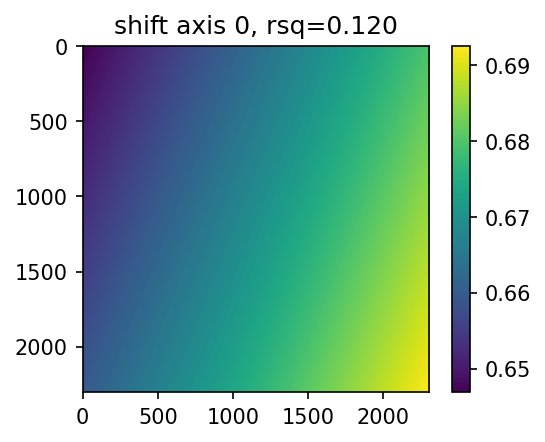

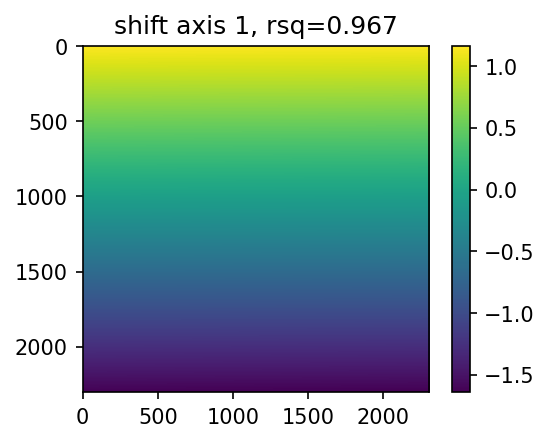

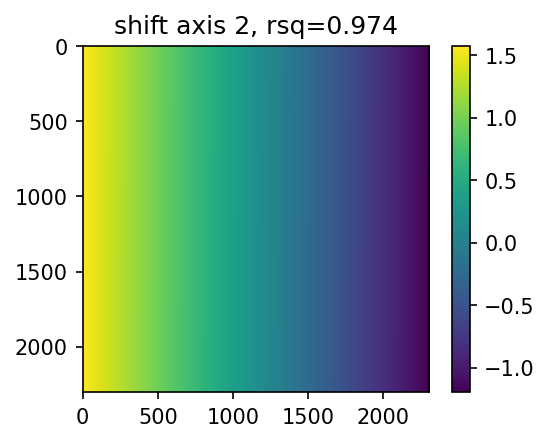

In [22]:
chromatic_pfs, chromatic_consts = chromatic.Generate_chromatic_abbrevation(
    cc_folder, ref_folder, chromatic_channel=chromatic_channel,
    ref_channel=chromatic_ref_channel,
    fiducial_channel=fiducial_channel,
    num_threads=15, start_fov=0, num_images=60,
    parallel=True,
    correction_folder=correction_folder, overwrite_profile=False,
    save_folder=correction_folder,
)

## Check chromatic correction

In [ ]:
from ChromAn.src.file_io import dax_process

In [23]:
# Test bleedthrough correction
test_filename = os.path.join(folders[0], fovs[2])

In [24]:
# Test the correction
from ChromAn.src.file_io import dax_process
daxp = dax_process.DaxProcesser(test_filename, CorrectionFolder=correction_folder, )
daxp._load_image()
print(daxp.ref_correction_channel)

Initialize DaxProcesser for file:/lab/weissman_imaging/puzheng/PE_LT/20231012-4T1v21x_50k0927_digestion_test/37c_2day/H0M1/Conv_zscan_002.dax
- New save file: /lab/weissman_imaging/puzheng/PE_LT/20231012-4T1v21x_50k0927_digestion_test/37c_2day/H0M1/Conv_zscan_002_processed.hdf5
-- all used channels: ['748', '637', '545', '477', '405']
-- single image size: [  40 2304 2304]
- Loaded images for channels:['748', '637', '545', '477', '405'] in 2.047s.
637


In [25]:
from ChromAn.src.visual_tools.interactive import imshow_mark_3d

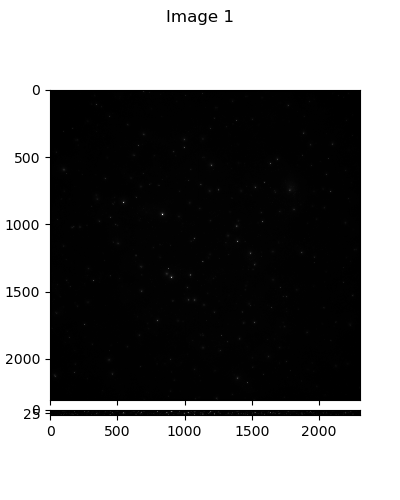

In [29]:
%matplotlib widget
# before correction
imshow_mark_3d([daxp.im_748, daxp.im_637, daxp.im_477])

In [108]:
daxp.()

- Start bleedthrough correction for channels:['748', '637', '545', '477'].
-- loading bleedthrough correction profile from file:bleedthrough_correction_748_637_545_477_2304_2304.npy
-- corrected bleedthrough for channel 748 in 6.364s.
-- corrected bleedthrough for channel 637 in 5.921s.
-- corrected bleedthrough for channel 545 in 5.977s.
-- corrected bleedthrough for channel 477 in 5.949s.
- finish bleedthrough correction in 27.508s. 


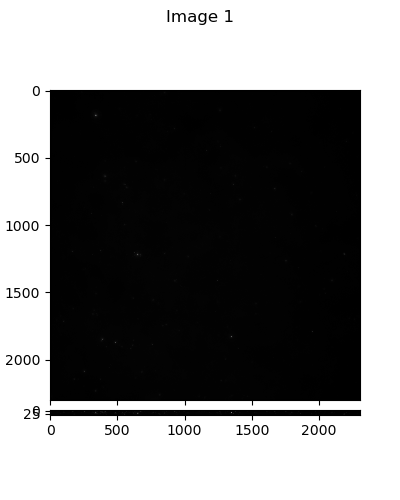

In [110]:
%matplotlib widget
# afater correction
imshow_mark_3d([daxp.im_637, daxp.im_545, daxp.im_477])